<a href="https://colab.research.google.com/github/Benedictus3/mvp-analise-dados/blob/main/MVP%20Analise%20de%20dados_LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# 🎮 Análise de Dados – League of Legends (Patch 25.11)

# 1. Introdução
# Este notebook tem como objetivo explorar atributos dos campeões do League of Legends no patch 25.11 (2025).
# A proposta é analisar os dados para identificar campeões com vantagens, padrões de distribuição de atributos e possíveis desbalanceamentos.

# 2. Importação das bibliotecas e carregamento dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [58]:
# Carregando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/Benedictus3/mvp-analise-dados/main/data.csv', index_col=0).reset_index().rename(columns={'index':'Champion'})
df.head()

,Champion,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,2400,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,1575,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,1575,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,2400,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,675,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


In [59]:
# 3. Visão Geral
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu

In [60]:
# Correção da nomeclatura da coluna
df = df.rename(columns={'apiname': 'name'})
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   name                172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu

In [61]:
# 3. Visão Geral
print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes:")
print(df.isnull().sum())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   name                172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu

In [62]:
# Ajuste em coluna
df['alttype'] = df['alttype'].fillna(df['herotype'])
print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes:")
print(df.isnull().sum())



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion            172 non-null    object 
 1   id                  172 non-null    float64
 2   name                172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             172 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-nu


Estatísticas descritivas:


,Champion,id,name,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
count,172,172.000000,172,172,172.000000,172,172,167,172,172,...,172.000000,172.000000,172,172,172,172,172,170,57,14
unique,172,NaN,171,170,NaN,6,6,14,172,2,...,NaN,NaN,171,172,171,172,171,170,56,14
top,Aatrox,NaN,Kled,the Missing Link,NaN,Fighter,Mage,Mana,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,NaN,NaN,{1: 'Rage Gene'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Violent Tendencies'},{1: 'Umbral Dash'},{1: 'GNAR!'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",Kled and Skaarl,GP
freq,1,NaN,2,2,NaN,49,47,142,1,91,...,NaN,NaN,2,1,2,1,2,1,2,1
mean,NaN,195.728488,NaN,NaN,1.872093,NaN,NaN,NaN,NaN,NaN,...,1568.906977,707.296512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,243.326685,NaN,NaN,0.671848,NaN,NaN,NaN,NaN,NaN,...,842.690430,218.351986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,225.000000,260.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,43.750000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,675.000000,585.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,102.500000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,1575.000000,790.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,233.250000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,2400.000000,880.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores faltantes por coluna:


,0
resource,5
skills,2
fullname,115
nickname,158


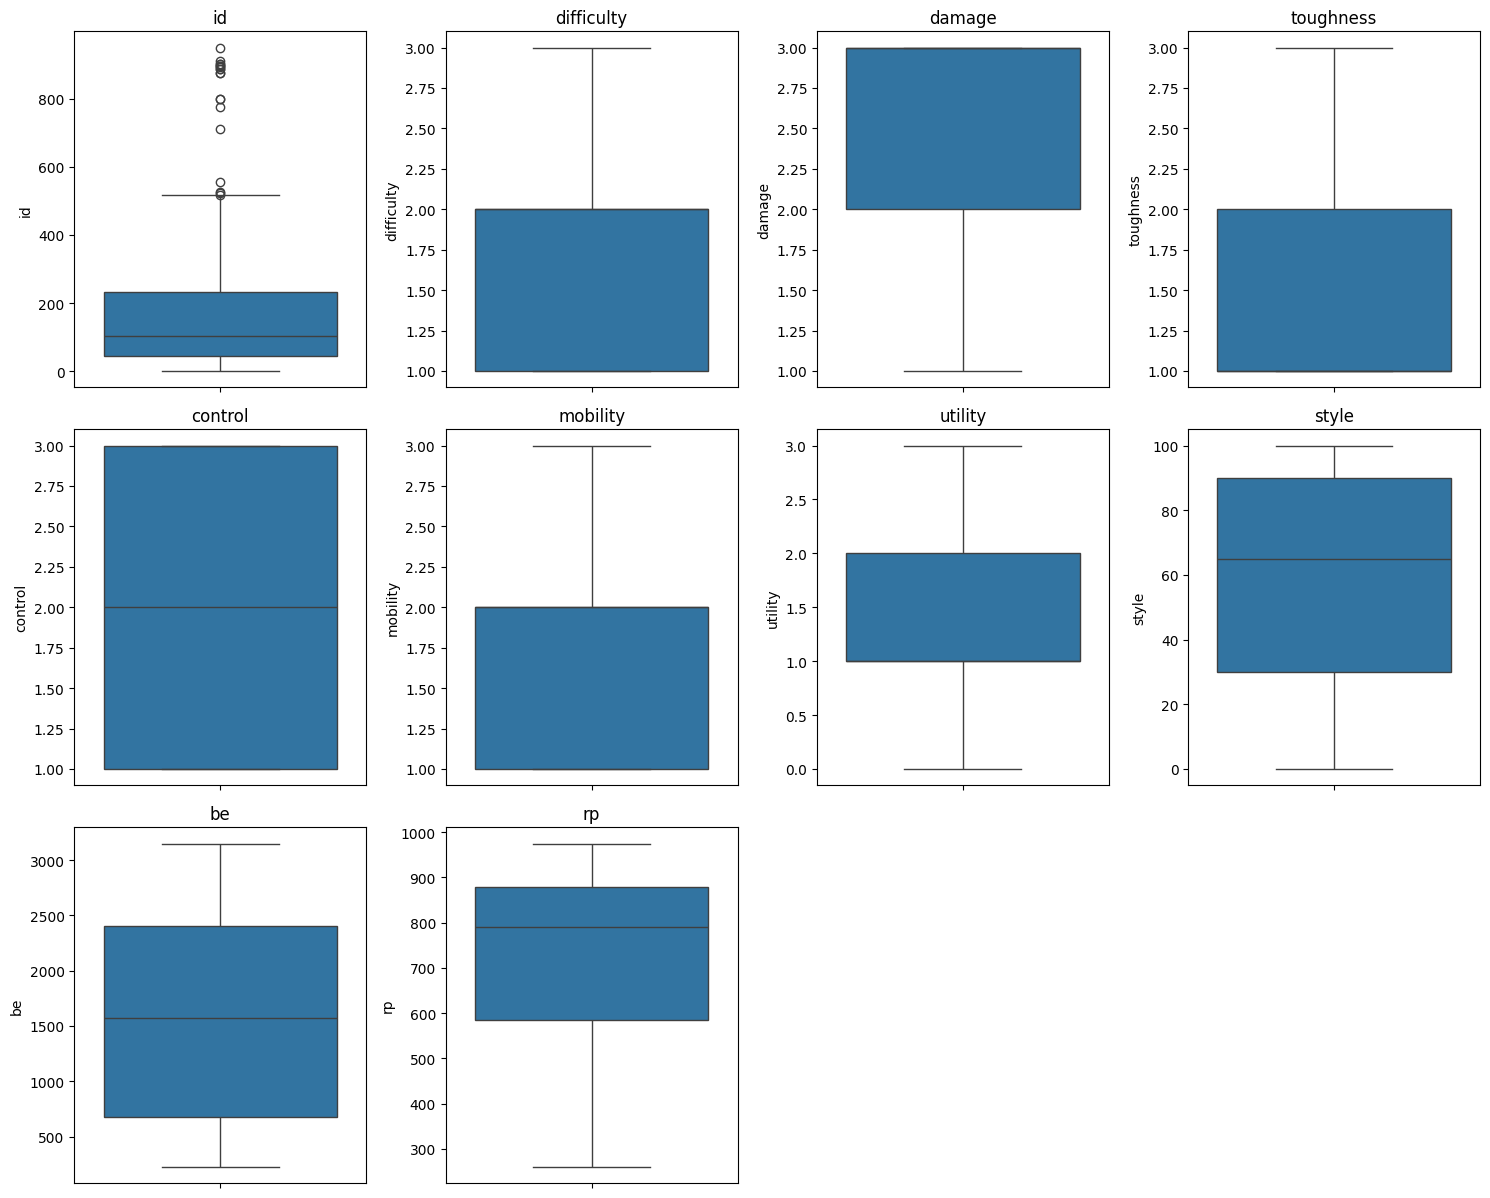

In [63]:
# Resumo estatístico
print("\nEstatísticas descritivas:")
display(df.describe(include='all'))

# Valores faltantes
print("\nValores faltantes por coluna:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Análise de outliers
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

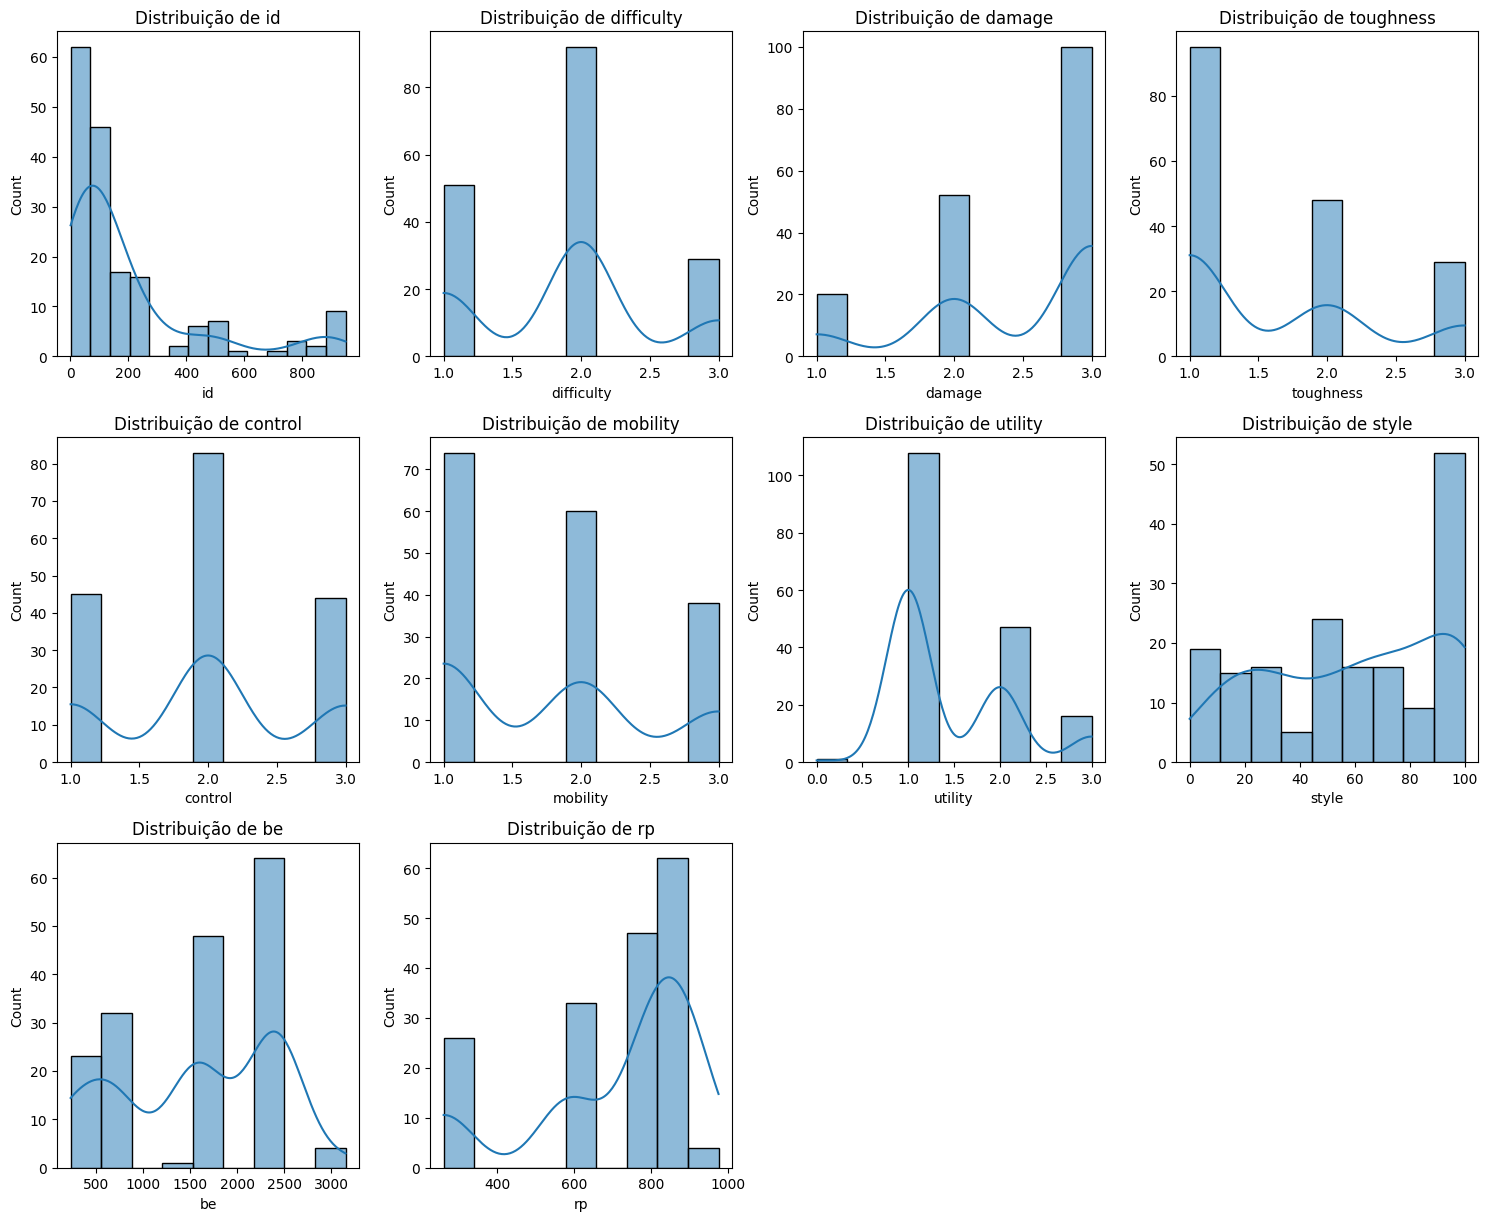

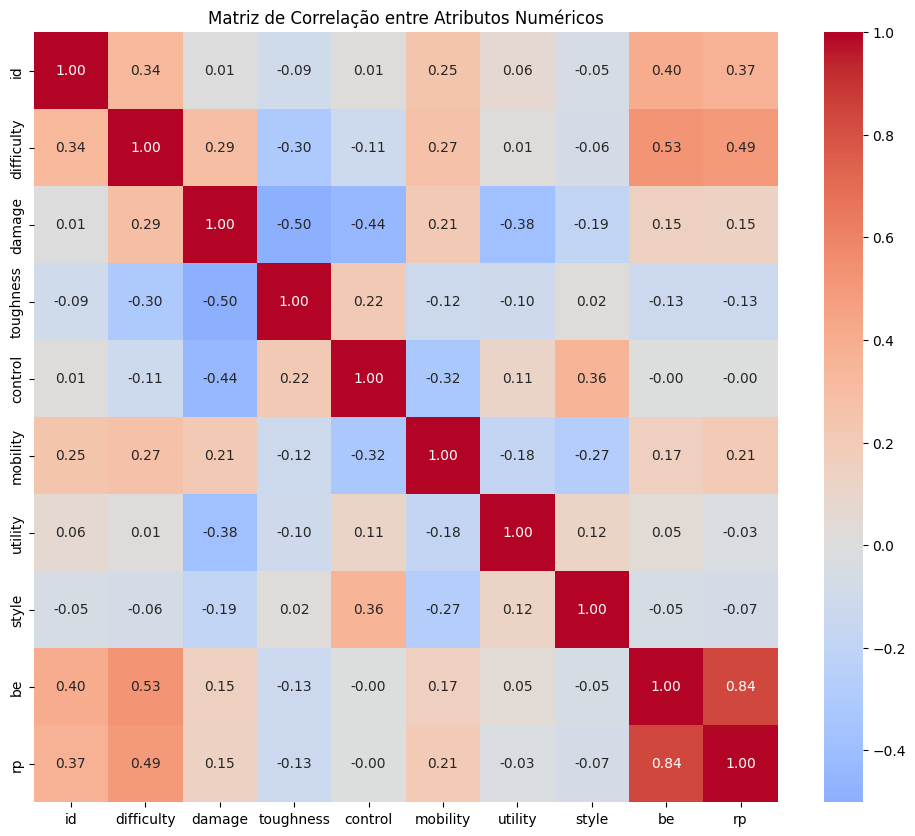

In [64]:
# Distribuição dos atributos numéricos
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Atributos Numéricos')
plt.show()

# Análise de classes (se aplicável)
if 'tier' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='tier', data=df)
    plt.title('Distribuição de Tiers')
    plt.show()

In [65]:
# 1. Tratamento de valores faltantes
# Primeiro, vamos identificar as colunas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Agora sim podemos usar o SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Para colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# 2. Codificação de variáveis categóricas
# Preservando o nome do campeão como identificador
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'champion_name'])

# 3. Normalização/Standardização
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verificação do resultado
print("Dataset após pré-processamento:")
display(df.head())

Dataset após pré-processamento:


,id,difficulty,damage,toughness,control,mobility,utility,style,be,rp,...,nickname_J4,nickname_Kagetora,nickname_LB,nickname_MF,nickname_Rainbow Scyther,nickname_Renata,"nickname_Rhaast, Darkin, Shadow Assassin",nickname_TF,nickname_Unknown,"nickname_Zaun Amorphous Combatant, Z.A.C."
0,0.289638,0.190937,0.770962,1.826882,0.008083,0.268567,0.818786,-1.240150,0.989117,0.793250,...,False,False,False,False,False,False,False,False,True,False
1,-0.382199,0.190937,0.770962,-0.813653,0.008083,1.551720,-0.679418,1.259772,0.007252,0.379868,...,False,False,False,False,False,False,False,False,True,False
2,-0.460511,0.190937,0.770962,-0.813653,-1.382137,1.551720,-0.679418,0.166056,0.007252,0.379868,...,False,False,False,False,False,False,False,False,True,False
3,-0.122532,1.683713,0.770962,-0.813653,-1.382137,1.551720,0.818786,-1.833881,0.989117,0.793250,...,False,False,False,False,False,False,False,False,True,False
4,-0.757274,-1.301840,-2.111765,1.826882,1.398302,-1.014586,0.818786,0.166056,-1.063875,-0.561724,...,False,False,False,False,False,False,False,False,True,False


In [76]:
 # Exemplo de preparação para modelagem
from sklearn.model_selection import train_test_split

if 'tier' in df.columns:
    X = df.drop(['champion_name', 'tier'], axis=1)
    y = df['tier']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Dados de treino: {X_train.shape}, Dados de teste: {X_test.shape}")